<a href="https://colab.research.google.com/github/ysgrProgramming/Yathzee/blob/main/Yahtzee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 役の定義

ルールが地域差等によって一定でないので、実際の役をより一般化して定義している。

handは昇順または降順でソートされていることが期待される。

In [2]:
def rank_num(hand, num):
    return hand.count(num)*num

def rank_num_of_kind(hand, num, point=None):
    count, buf = 0, -1
    for i in hand:
        if buf == i:
            count += 1
            if count == num: break
        else:
            count = 1
            buf = i
    else: return 0

    if point: return point
    else: return sum(hand)

def rank_full_house(hand, point=None):
    if hand[0] == hand[1] and hand[3] == hand[4] and hand[0] != hand[4]:
        if hand[2] == hand[0] or hand[2] == hand[4]:
            if point: return point
            else: return sum(hand)
    return 0

def rank_straight(hand, num, point=None):
    count, buf = 0, -2
    for i in hand:
        if i == buf+1:
            count += 1
            if count == num: break
        else: count = 1
        buf = i
    else: return 0

    if point: return point
    else: return sum(hand)

def rank_chance(hand):
    return sum(hand)

rank_list = []
rank_list.append(lambda hand: rank_num(hand, 1))
rank_list.append(lambda hand: rank_num(hand, 2))
rank_list.append(lambda hand: rank_num(hand, 3))
rank_list.append(lambda hand: rank_num(hand, 4))
rank_list.append(lambda hand: rank_num(hand, 5))
rank_list.append(lambda hand: rank_num(hand, 6))
rank_list.append(rank_chance)
rank_list.append(lambda hand: rank_num_of_kind(hand, 4))
rank_list.append(rank_full_house)
rank_list.append(lambda hand: rank_straight(hand, 4, 15))
rank_list.append(lambda hand: rank_straight(hand, 5, 30))
rank_list.append(lambda hand: rank_num_of_kind(hand, 5, 50))

## パターンリストの作成
n個のサイコロの出目のパターンとその整数確率比を格納するリストを作成する。$6^5$通りを全探索するよりも計算量の改善が見込める。

In [3]:
from itertools import product

rank_len = len(rank_list)
bonus, bonus_point = 35, 63
data_list = np.array([[-1]*(bonus_point+1) for _ in range(1<<rank_len)], dtype=float)
data_list[-1,:] = 0

rate_list = [dict() for _ in range(5)]
for i in range(5):
    rate = 6**(4-i)
    for a in product(range(1, 7), repeat=i+1):
        key = tuple(sorted(a))
        if key in rate_list[i]:
            rate_list[i][key] += rate
        else: 
            rate_list[i][key] = rate

print(rate_list)
pat_dict = {k: i for i, k in enumerate(rate_list[-1].keys())}
pat_list = [k for k in rate_list[-1].keys()]

def test_func(func):
    li = []
    for key in pat_dict.keys():
        if func(key) == 0: continue
        li.append((func(key), key))
    return sorted(li, reverse=True)

test_func(rank_list[9])

[{(1,): 1296, (2,): 1296, (3,): 1296, (4,): 1296, (5,): 1296, (6,): 1296}, {(1, 1): 216, (1, 2): 432, (1, 3): 432, (1, 4): 432, (1, 5): 432, (1, 6): 432, (2, 2): 216, (2, 3): 432, (2, 4): 432, (2, 5): 432, (2, 6): 432, (3, 3): 216, (3, 4): 432, (3, 5): 432, (3, 6): 432, (4, 4): 216, (4, 5): 432, (4, 6): 432, (5, 5): 216, (5, 6): 432, (6, 6): 216}, {(1, 1, 1): 36, (1, 1, 2): 108, (1, 1, 3): 108, (1, 1, 4): 108, (1, 1, 5): 108, (1, 1, 6): 108, (1, 2, 2): 108, (1, 2, 3): 216, (1, 2, 4): 216, (1, 2, 5): 216, (1, 2, 6): 216, (1, 3, 3): 108, (1, 3, 4): 216, (1, 3, 5): 216, (1, 3, 6): 216, (1, 4, 4): 108, (1, 4, 5): 216, (1, 4, 6): 216, (1, 5, 5): 108, (1, 5, 6): 216, (1, 6, 6): 108, (2, 2, 2): 36, (2, 2, 3): 108, (2, 2, 4): 108, (2, 2, 5): 108, (2, 2, 6): 108, (2, 3, 3): 108, (2, 3, 4): 216, (2, 3, 5): 216, (2, 3, 6): 216, (2, 4, 4): 108, (2, 4, 5): 216, (2, 4, 6): 216, (2, 5, 5): 108, (2, 5, 6): 216, (2, 6, 6): 108, (3, 3, 3): 36, (3, 3, 4): 108, (3, 3, 5): 108, (3, 3, 6): 108, (3, 4, 4): 1

[(15, (3, 4, 5, 6, 6)),
 (15, (3, 3, 4, 5, 6)),
 (15, (2, 3, 4, 5, 6)),
 (15, (2, 3, 4, 5, 5)),
 (15, (2, 2, 3, 4, 5)),
 (15, (1, 3, 4, 5, 6)),
 (15, (1, 2, 3, 4, 6)),
 (15, (1, 2, 3, 4, 5)),
 (15, (1, 2, 3, 4, 4)),
 (15, (1, 1, 2, 3, 4))]

## パターンの遷移についてのリストを作成する

パターンと役の組み合わせによる点数のリスト、`rank_point_list`を作成した。

パターンとキープの組み合わせによる遷移先のパターンとその整数確率のリスト、`trans_list`を作成した。整数確率とは、確率に$6^5$をかけて表す。

In [4]:
pat_len = len(rate_list[-1])

#パターンと役の組み合わせによる点数のリスト
rank_point_list = np.zeros((pat_len, rank_len), dtype=int)
for i, k in enumerate(rate_list[-1].keys()):
    for j in range(rank_len):
        rank_point_list[i][j] = rank_list[j](k)

#choiceを含むパターンを全て生成
def list_pat(choice):
    n = len(choice)
    for key, value in rate_list[4-n].items():
        key = list(key)
        key.extend(choice)
        pat = tuple(sorted(key))
        yield pat, value

#パターンとキープの組み合わせによる遷移先のパターンとその整数確率のリスト
trans_list = [[] for _ in range(pat_len)]
keep_list = [[] for _ in range(pat_len)]
for i, k in enumerate(rate_list[-1].keys()):
    choice_set = set()
    for j in range(1, 1<<5):
        li = []
        choice = []
        for l in range(5):
            if 1<<l & j: continue
            choice.append(k[l])
        choice = tuple(choice)
        if choice in choice_set: continue
        choice_set.add(choice)
        for pat, value in list_pat(choice):
            li.append((pat_dict[pat], value))
        trans_list[i].append(li)
        keep_list[i].append(choice)

In [7]:
#出目確定時の期待値
def init_val_list(bit_set, bonus_index):
    val_list = np.zeros(pat_len, dtype=float)
    available_list = []
    for i in range(rank_len):
        if bit_set & 1<<i == 0: available_list.append(i)

    for i in range(pat_len):
        for j in available_list:
            bonus_add = 0
            if j < 6: bonus_add = rank_point_list[i][j]
            if bonus_index+bonus_add >= bonus_point and bonus_index < bonus_point:
                val = rank_point_list[i,j] + bonus + data_list[bit_set+(1<<j)][-1]
            else: 
                val = rank_point_list[i,j] + data_list[bit_set+(1<<j)][min(bonus_point, bonus_index+bonus_add)]
            val_list[i] = max(val_list[i], val)
    
    return val_list

#振数残存時の期待値
def update_val_list(val_list):
    new_val_list = np.copy(val_list)
    for i in range(pat_len):
        for trans in trans_list[i]:
            val = 0
            for k, v in trans:
                val += val_list[k]*v
            val /= 6**5
            new_val_list[i] = max(val, new_val_list[i])
    return new_val_list

In [ ]:
pause = (1<<rank_len)-2
for i in range(pause, -1, -1):
    bonus_limit = 0
    for j in range(6):
        if i & 1<<j == 0: bonus_limit += (j+1)*5
    
    for j in range(max(0, bonus_point-bonus_limit), bonus_point+1):
        val_list = init_val_list(i, j)
        for k in range(2):
            val_list = update_val_list(val_list)

        total = 0
        for k, v in enumerate(rate_list[-1].values()):
            total += val_list[k]*v
        total /= 6**5
        data_list[i][j] = total

    for j in range(bonus_point-bonus_limit):
        data_list[i][j] = data_list[i][-1]

    print(bin(i)[2:])
    print(data_list[i])
    print()
    if i % (1<<8) == 0: np.save("{0}".format(i), data_list)

In [10]:
data_list = np.load("yahtzee_data_list.npy")

def find_earnest_keep(val_list, hand):
    index = pat_dict[hand]
    route_list = [(val_list[index], hand)]
    for trans, keep in zip(trans_list[index], keep_list[index]):
        val = 0
        for k, v in trans:
            val += val_list[k]*v
        val /= 6**5
        route_list.append((val, keep))
    route_list.sort(reverse=True)
    return route_list

def find_earnest_rank(current_rank, hand, bonus_index):
    index = pat_dict[hand]
    route_list = []
    for i in range(rank_len):
        if current_rank & 1<<i: continue
        bonus_add = 0
        if i < 6: bonus_add = rank_point_list[index, i]
        if bonus_index+bonus_add >= bonus_point and bonus_index < bonus_point:
            val = rank_point_list[index, i] + bonus + data_list[current_rank+(1<<i)][-1]
        else: 
            val = rank_point_list[index, i] + data_list[current_rank+(1<<i)][min(bonus_point, bonus_index+bonus_add)]
        route_list.append((val, i, bonus_add))
    route_list.sort(reverse=True)
    return route_list

current_rank = 0
total = 0
bonus_index = 0
rankname_list = ["1", "2", "3", "4", "5", "6", "chance", "same4", "full-house", "s-straight", "b-straight", "yahtzee"]
for i in range(rank_len):
    #一手目
    hand = tuple(sorted(map(int, input().split())))
    val_list = init_val_list(current_rank, bonus_index)
    val_list = update_val_list(val_list)
    route_list = find_earnest_keep(val_list, hand)
    for i in range(3):
        print("第{0}候補 期待値:{1}, 選択:{2}".format(i+1, route_list[i][0]+total, route_list[i][1]))

    #二手目
    hand = tuple(sorted(map(int, input().split())))
    index = pat_dict[hand]
    val_list = init_val_list(current_rank, bonus_index)
    route_list = find_earnest_keep(val_list, hand)
    for i in range(3):
        print("第{0}候補 期待値:{1}, 選択:{2}".format(i+1, route_list[i][0]+total, route_list[i][1]))

    #三手目
    hand = tuple(sorted(map(int, input().split())))
    route_list = find_earnest_rank(current_rank, hand, bonus_index)
    for i in range(min(3, len(route_list))):
        print("第{0}候補 期待値:{1}, 選択:{2}".format(i+1, route_list[i][0]+total, rankname_list[route_list[i][1]]))

    current_rank += 1<<route_list[0][1]
    total += rank_point_list[index, route_list[0][1]]
    if bonus_index+route_list[0][2] >= bonus_point and bonus_index < bonus_point: total += bonus
    bonus_index = min(bonus_point, bonus_index+route_list[0][2])

    print("現在の得点:{0}, ボーナスまで:{1}, 役状況:{2}".format(total, bonus_point-bonus_index, bin(current_rank)[2:].zfill(rank_len)))
    print()

第1候補 期待値:196.13641910922408, 選択:(5, 5, 5)
第2候補 期待値:193.81023982872858, 選択:(4, 5, 5, 5)
第3候補 期待値:193.6740222185736, 選択:(1, 5, 5, 5)
第1候補 期待値:191.5186076652487, 選択:(5, 5, 5)
第2候補 期待値:189.86544353459217, 選択:(5, 5, 5, 6)
第3候補 期待値:188.5321102012588, 選択:(2, 5, 5, 5)
第1候補 期待値:185.51887523113461, 選択:5
第2候補 期待値:178.84189968717558, 選択:chance
第3候補 期待値:173.67325896691725, 選択:1
現在の得点:15, ボーナスまで:48, 役状況:000000010000

第1候補 期待値:187.99858736328284, 選択:(2, 2, 2)
第2候補 期待値:185.98441708091326, 選択:(2, 2, 2, 6)
第3候補 期待値:185.98441708091326, 選択:(1, 2, 2, 2)
第1候補 期待値:184.43472034956065, 選択:(2, 2, 2)
第2候補 期待値:182.9288783361238, 選択:(2, 2, 2, 6)
第3候補 期待値:182.45033267359108, 選択:(2, 2, 2, 3)
第1候補 期待値:181.2345881897631, 選択:2
第2候補 期待値:172.46038293932543, 選択:1
第3候補 期待値:169.75212896240282, 選択:yahtzee
現在の得点:21, ボーナスまで:42, 役状況:000000010010

第1候補 期待値:180.09617568773191, 選択:(4, 4)
第2候補 期待値:178.2253796463046, 選択:(2, 4, 4)
第3候補 期待値:177.51289592634237, 選択:(4,)
第1候補 期待値:174.55907415993937, 選択:(4, 4)
第2候補 期待値:172.8235496237311, 

KeyboardInterrupt: ignored

In [15]:
data_list = np.load("yahtzee_data_list.npy")

def find_earnest_keep(val_list, hand):
    index = pat_dict[hand]
    route_list = [(val_list[index], hand)]
    for trans, keep in zip(trans_list[index], keep_list[index]):
        val = 0
        for k, v in trans:
            val += val_list[k]*v
        val /= 6**5
        route_list.append((val, keep))
    route_list.sort(reverse=True)
    return route_list

def find_earnest_rank(current_rank, hand, bonus_index):
    index = pat_dict[hand]
    route_list = []
    for i in range(rank_len):
        if current_rank & 1<<i: continue
        bonus_add = 0
        if i < 6: bonus_add = rank_point_list[index, i]
        if bonus_index+bonus_add >= bonus_point and bonus_index < bonus_point:
            val = rank_point_list[index, i] + bonus + data_list[current_rank+(1<<i)][-1]
        else: 
            val = rank_point_list[index, i] + data_list[current_rank+(1<<i)][min(bonus_point, bonus_index+bonus_add)]
        route_list.append((val, i, bonus_add))
    route_list.sort(reverse=True)
    return route_list

n = 100
point_list = np.zeros(n)
for i in range(n):
    current_rank, total, bonus_index = 0, 0, 0
    for j in range(rank_len):
        hand = tuple(sorted(np.random.randint(1, 7, 5)))
        val_list1 = init_val_list(current_rank, bonus_index)
        val_list2 = update_val_list(val_list1)
        route_list = find_earnest_keep(val_list2, hand)
        keep = route_list[0][1]

        hand = np.random.randint(1, 7, 5)
        for k in range(len(keep)):
            hand[k] = keep[k]
        hand = tuple(sorted(hand))
        route_list = find_earnest_keep(val_list1, hand)
        keep = route_list[0][1]

        hand = np.random.randint(1, 7, 5)
        for k in range(len(keep)):
            hand[k] = keep[k]
        hand = tuple(sorted(hand))
        index = pat_dict[hand]
        route_list = find_earnest_rank(current_rank, hand, bonus_index)

        rank, bonus_add = route_list[0][1:]
        current_rank += 1<<rank
        total += rank_point_list[index, rank]
        if bonus_index+bonus_add >= bonus_point and bonus_index < bonus_point: total += bonus
        bonus_index = min(bonus_point, bonus_index+bonus_add)

    print(i, total)
    point_list[i] = total

0 241
1 153
2 213
3 201
4 188
5 237
6 114
7 171
8 196
9 188
10 236
11 251
12 213
13 202
14 209
15 249
16 152
17 160
18 186
19 111
20 213
21 142
22 119
23 171
24 197
25 194
26 141
27 258
28 219
29 211
30 134
31 186
32 185
33 241
34 178
35 180
36 188
37 140
38 218
39 214
40 220
41 278
42 115
43 224
44 168
45 146
46 201
47 282
48 121
49 196
50 177
51 224
52 129
53 180
54 231
55 242
56 197
57 271
58 167
59 163
60 160
61 216
62 214
63 214
64 167
65 230
66 191
67 215
68 144
69 208
70 207
71 168
72 220
73 100
74 201
75 187
76 263
77 223
78 154
79 184
80 163
81 162
82 260
83 159
84 219
85 188
86 209
87 188
88 222
89 250
90 182
91 222
92 197
93 205
94 140
95 169
96 271
97 180
98 215
99 279


168.0 197.0 220.0
194.78


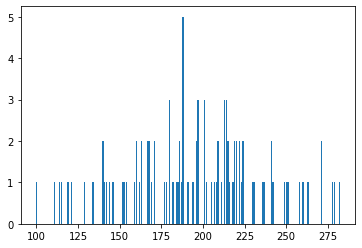

In [16]:
x = np.arange(min(point_list), max(point_list)+1)
count_list = []
for i in x:
    count_list.append(np.count_nonzero(point_list == i))
plt.bar(x, count_list)

point_list.sort()
print(point_list[25], point_list[50], point_list[75])
print(sum(point_list)/len(point_list))